In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
pima_df = pd.read_csv("pima-indians-diabetes.data",names=colnames)

In [3]:
#X =  pima_df.drop("outcome", axis=1)
#y =  pima_df.pop("outcome")

In [4]:
X = pima_df[['glu','bmi', 'dpf', 'age']]
y = pima_df.pop("outcome")

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [61]:
dt_full=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)
#bg = BaggingClassifier(base_estimator=dt_full,random_state=0,n_estimators=100)
rf = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0)
ab = AdaBoostClassifier(n_estimators=51,random_state=0)
gb = GradientBoostingClassifier(n_estimators=90,random_state=0)

In [62]:
#gbstack = GradientBoostingClassifier(n_estimators=200,random_state=0)
lr = LogisticRegression()

In [63]:
vc = VotingClassifier(estimators = [('ab',ab),('rf',rf),('gb', gb)])
sc = StackingClassifier(estimators = [('ab',ab),('rf',rf),('gb', gb)], final_estimator=lr)

In [64]:
models = []
models.append(('dt_full', dt_full))
models.append(('rf', rf))
models.append(('ab', ab))
models.append(('gb', gb))
models.append(('vc', vc))
models.append(('sc',sc))

dt_full: 0.688846 (0.056228)
rf: 0.743528 (0.038514)
ab: 0.760462 (0.031359)
gb: 0.761727 (0.037968)
vc: 0.761735 (0.042782)
sc: 0.761743 (0.040032)


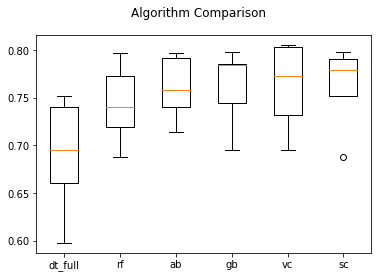

In [65]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	 kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [67]:
results

[array([0.69480519, 0.5974026 , 0.74025974, 0.75163399, 0.66013072]),
 array([0.74025974, 0.68831169, 0.77272727, 0.79738562, 0.71895425]),
 array([0.74025974, 0.71428571, 0.79220779, 0.79738562, 0.75816993]),
 array([0.78571429, 0.69480519, 0.7987013 , 0.78431373, 0.74509804]),
 array([0.77272727, 0.69480519, 0.80519481, 0.80392157, 0.73202614]),
 array([0.77922078, 0.68831169, 0.7987013 , 0.79084967, 0.75163399])]